### 特徵工程(包含標準化及取Log)

In [41]:
import pandas as pd

df = pd.read_csv('processed_data.csv')
df.head()

,popularity,year,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,...,gn_other,gn_pop,gn_reggae,gn_rock,gn_world_music,ts_0,ts_1,ts_3,ts_4,ts_5
0,68,2012,0.483,0.303,4,-10.058,1,0.0429,0.6940,0.000000,...,0,0,0,0,0,0,0,1,0,0
1,50,2012,0.572,0.454,3,-10.286,1,0.0258,0.4770,0.000014,...,0,0,0,0,0,0,0,0,1,0
2,57,2012,0.409,0.234,3,-13.711,1,0.0323,0.3380,0.000050,...,0,0,0,0,0,0,0,0,1,0
3,58,2012,0.392,0.251,10,-9.845,1,0.0363,0.8070,0.000000,...,0,0,0,0,0,0,0,0,1,0
4,54,2012,0.430,0.791,6,-5.419,0,0.0302,0.0726,0.019300,...,0,0,0,0,0,0,0,0,1,0


In [42]:
df.shape

(997563, 34)

In [43]:
import numpy as np

# 要取對數的特征列表
features_to_log = ['loudness', 'speechiness', 'liveness']

# 為了避免負值和零，對 loudness 進行正值轉換，因為它可能有負值
df['loudness'] = df['loudness'] - df['loudness'].min() + 1
df['speechiness'] = df['speechiness'] - df['speechiness'].min() + 1
df['liveness'] = df['liveness'] - df['liveness'].min() + 1

# 對這些特徵取對數，並在取對數之前加上一個很小的正數
epsilon = 1e-10
for feature in features_to_log:
    df[feature] = np.log(df[feature] + epsilon)

# 顯示轉換後的特徵的前幾行
print(df[features_to_log].head())

   loudness  speechiness  liveness
0  3.892677     0.042005  0.108854
1  3.888017     0.025473  0.092944
2  3.815270     0.031789  0.085719
3  3.897011     0.035657  0.076683
4  3.983059     0.029753  0.104360


In [44]:
from sklearn.preprocessing import StandardScaler

# Features to standardize
features_to_standardize = ['loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'tempo']

# Initialize the StandardScaler
scaler = StandardScaler()

# Apply the standardization to the f_engineering dataframe
df[features_to_standardize] = scaler.fit_transform(df[features_to_standardize])

# Display the first few rows of the standardized features
print(df[features_to_standardize].head())


   loudness  speechiness  acousticness  instrumentalness  liveness     tempo
0 -0.134328    -0.487698      1.108712         -0.677283 -0.544445  0.389839
1 -0.169442    -0.731669      0.483289         -0.677245 -0.657389  0.616968
2 -0.717622    -0.638456      0.082673         -0.677145 -0.708676  0.605236
3 -0.101671    -0.581385      1.434392         -0.677283 -0.772816  2.788340
4  0.546737    -0.668506     -0.682244         -0.623949 -0.576349  1.678939


In [40]:
df.head()

,popularity,year,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,...,gn_other,gn_pop,gn_reggae,gn_rock,gn_world_music,ts_0,ts_1,ts_3,ts_4,ts_5
0,68,2012,0.483,0.303,4,NaN,1,-0.149339,1.108712,-0.677283,...,0,0,0,0,0,0,0,1,0,0
1,50,2012,0.572,0.454,3,NaN,1,-0.419220,0.483289,-0.677245,...,0,0,0,0,0,0,0,0,1,0
2,57,2012,0.409,0.234,3,NaN,1,-0.299139,0.082673,-0.677145,...,0,0,0,0,0,0,0,0,1,0
3,58,2012,0.392,0.251,10,NaN,1,-0.237265,1.434392,-0.677283,...,0,0,0,0,0,0,0,0,1,0
4,54,2012,0.430,0.791,6,NaN,0,-0.334927,-0.682244,-0.623949,...,0,0,0,0,0,0,0,0,1,0


array([[<Axes: title={'center': 'popularity'}>,
        <Axes: title={'center': 'year'}>,
        <Axes: title={'center': 'danceability'}>,
        <Axes: title={'center': 'energy'}>,
        <Axes: title={'center': 'key'}>,
        <Axes: title={'center': 'loudness'}>],
       [<Axes: title={'center': 'mode'}>,
        <Axes: title={'center': 'speechiness'}>,
        <Axes: title={'center': 'acousticness'}>,
        <Axes: title={'center': 'instrumentalness'}>,
        <Axes: title={'center': 'liveness'}>,
        <Axes: title={'center': 'valence'}>],
       [<Axes: title={'center': 'tempo'}>,
        <Axes: title={'center': 'duration_mins'}>,
        <Axes: title={'center': 'gn_acoustic'}>,
        <Axes: title={'center': 'gn_ambient_music'}>,
        <Axes: title={'center': 'gn_blues_jazz'}>,
        <Axes: title={'center': 'gn_classical'}>],
       [<Axes: title={'center': 'gn_dance'}>,
        <Axes: title={'center': 'gn_electronic'}>,
        <Axes: title={'center': 'gn_folk'}>,


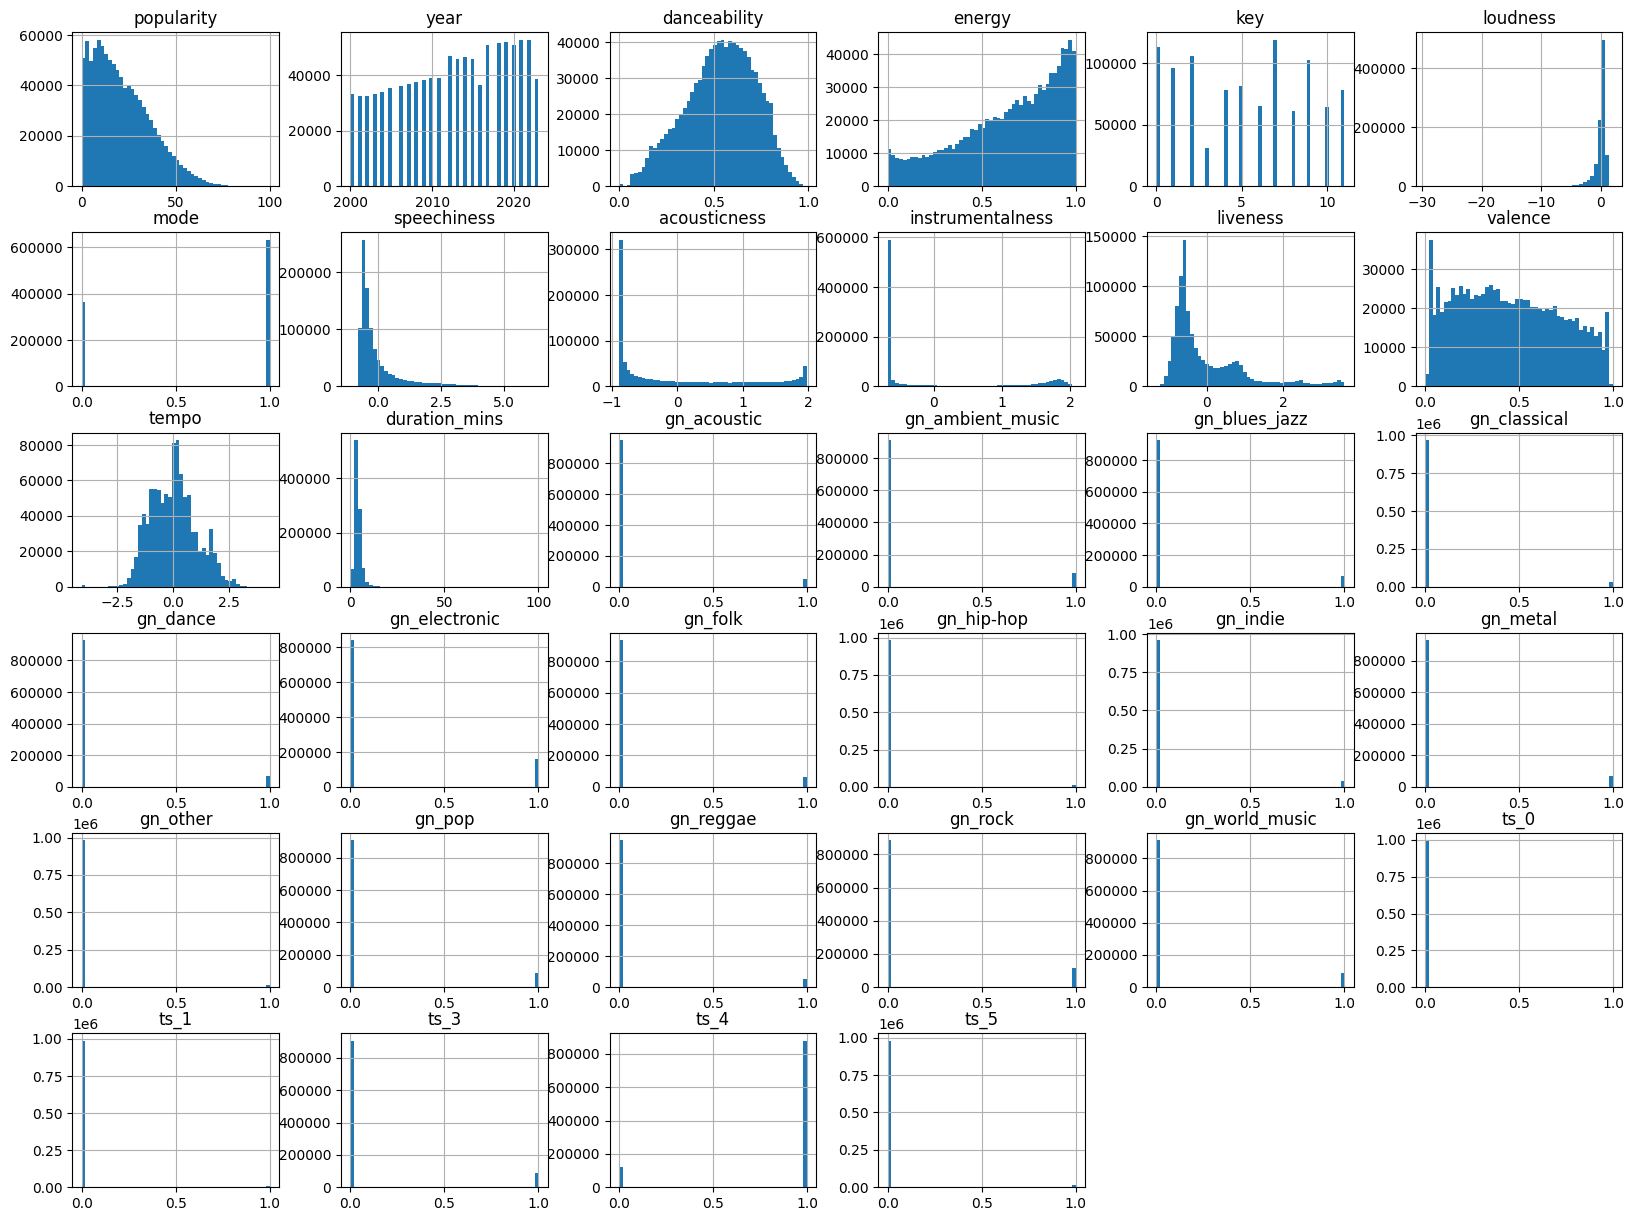

In [45]:
df.hist(bins=50, figsize=(20, 15))

In [46]:
df.to_csv('feature_log_data.csv', index=False)